In [46]:
#default_exp optimizers

In [47]:
#export
from os import path
import requests
import numpy as np
import pandas as pd
from typing import List, Callable, Tuple
from skopt import gp_minimize
from time_series_model_basics import moving_average, smoothing, metrics, simulate_data
from functools import partial

# Optimizers
> Optimize Objective Functions

In [48]:
#export
def minimize_objective(
    objective: Callable,
    param_names: List[str],
    param_ranges: List[Tuple[float, float]],
    *,
    ts: np.array,
    score_f: Callable = metrics.__mean_absolute_error,
) -> Tuple[float, float]:

    def smoothing_partial(*args: List[float]) -> float:

        forecast = smoothing.__single(
            ts=ts,
            alpha=alpha[0],
        )
        val = score_f(ts=ts, f=forecast)
        return val

    res = gp_minimize(
        smoothing_partial,
        [(0.0, 1), (0.0, 1)],
        n_calls=20,
    )
    print("x*=%.2f f(x*)=%.2f" % (res.x[0], res.fun))
    return res.x[0]

In [49]:
#export
def minimize_simple_smoothing(
    ts: np.array,
    score_f=metrics.__mean_absolute_error,
) -> float:

    def smoothing_partial(alpha: List[float]) -> float:
        forecast = smoothing.__single(
            ts=ts,
            alpha=alpha[0],
        )
        val = score_f(ts=ts, f=forecast)
        return val

    res = gp_minimize(
        smoothing_partial,
        [(0.0, 1)],
        n_calls=20,
    )
    print("x*=%.2f f(x*)=%.2f" % (res.x[0], res.fun))
    return res.x[0]

In [50]:
ts_df = simulate_data.pandas_time_series()
alpha = minimize_simple_smoothing(ts=ts_df.time_series.to_numpy(),)
_, fig = smoothing.SINGLE(
    alpha,
    df=ts_df,
    ts_col='time_series',
)

x*=0.66 f(x*)=0.69


In [51]:
#export
def minimize_double_smoothing(
    ts: np.array,
    score_f=metrics.__mean_absolute_error,
) -> float:

    def smoothing_partial(args: List[float]) -> float:

        forecast = smoothing.__double(
            ts=ts,
            alpha=args[0],
            beta=args[1],
        )
        val = score_f(ts=ts, f=forecast)
        return val

    res = gp_minimize(
        smoothing_partial,
        [(0.0, 1), (0.0, 1)],
        n_calls=20,
    )
    print("x*=%.2f, y*=%.2f, f(x*,y*)=%.2f" % (
        res.x[0],
        res.x[1],
        res.fun,
    ))
    return res.x

In [52]:
ts_df = simulate_data.pandas_time_series()
res = minimize_double_smoothing(ts=ts_df.time_series.to_numpy(),)
res

x*=0.37, y*=1.00, f(x*,y*)=0.68


[0.3671860438647993, 1.0]

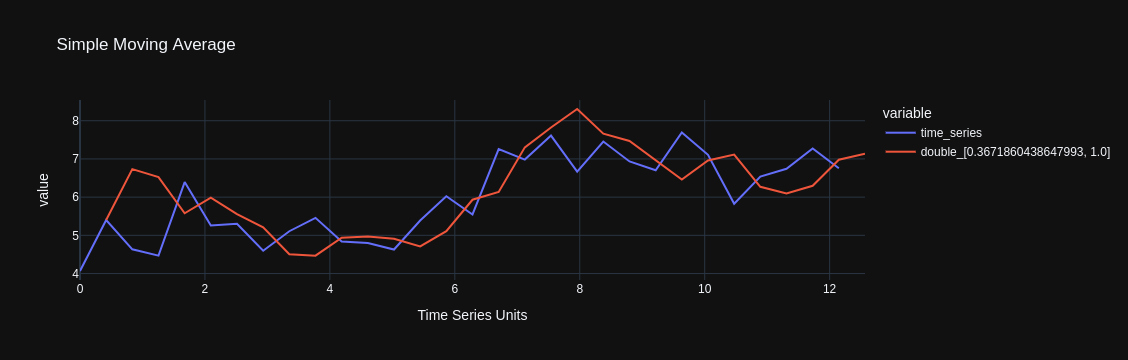

In [53]:
_, fig = smoothing.DOUBLE(
    res,
    df=ts_df,
    ts_col='time_series',
)
fig.show()

In [54]:
datafile = '../data/superstore_sales.csv'
url = "https://raw.githubusercontent.com/" + \
      "BigDataGal/Python-for-Data-Science/master/Superstore-Sales.csv"

if not path.isfile(datafile):
    with open(datafile, 'w') as file:
        r = requests.get(url)
        file.write(r.text)

df = pd.read_csv(
    datafile,
    index_col='Order Date',
    dtype={
        'Row ID': str,
        'Order ID': str,
    },
    parse_dates=['Order Date', 'Ship Date'],
)

df.columns = ['_'.join(x.lower().split(' ')) for x in df.columns]

In [55]:
dff = df.head(int(0.4 * len(df)))

minimize_simple_smoothing(dff.sales.to_numpy())

/opt/conda/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

/opt/conda/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

/opt/conda/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

/opt/conda/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

/opt/conda/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

/opt/conda/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.

/opt/conda/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.


x*=0.00 f(x*)=1562.20


0.0

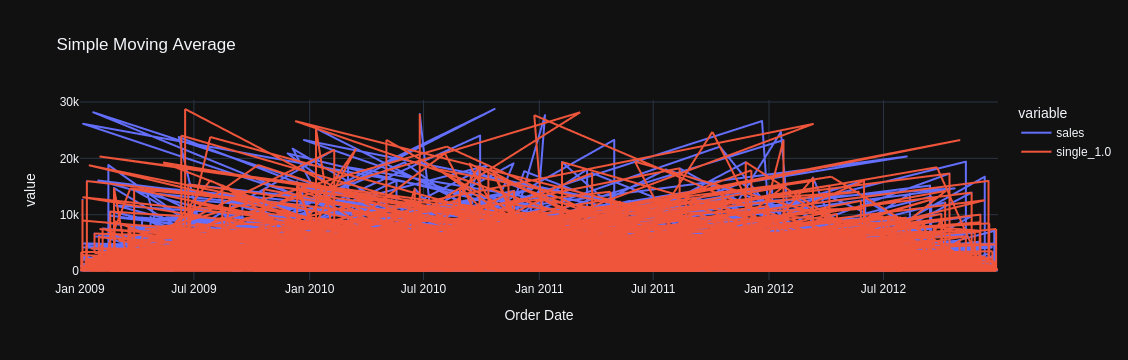

In [56]:
_, fig = smoothing.SINGLE(1., df=dff.copy(), ts_col='sales')
fig.show()

In [57]:
del sma(**args):
    
    ar
    
    
    
    

SyntaxError: invalid syntax (<ipython-input-57-5e41ba70a8bc>, line 1)